# Etape 6 : Testez une API de collecte de données

## 6.1 - Analyse de l'exploitation de l'API :

Afin de pouvoir requêter la "FOOD DATABASE" du site EDAMAM, on nous propose une API (version 2.0) avec plusieurs options implémentées dans 3 `url` : 
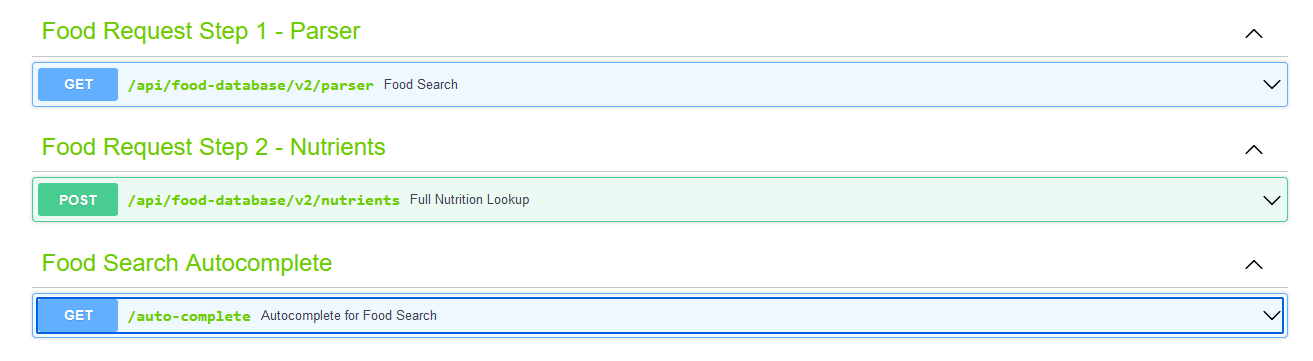



Dans notre cas de recherche de **produits à base de "champagne"**, je vais utiliser la fonction de **'Food Search'** en passant par l'url du Parser.  

Avec les informations fournies par le documentation de l'API, notre requête doit être sous la forme :  
`https://api.edamam.com/api/food-database/v2/parser?` + les identifiants personnels **app_id** et **app_key** + les paramètres (filtres) voulus, renseignés :  
exemple `category=generic-meals`

Pour notre situation, les paramètres dont nous avons besoin sont :
* `app_id=********`
* `app_key=****************`
* `ingr=champagne`
* `nutrition-type=logging`

Nous devons donc générer une requête avec Python au format :
`https://api.edamam.com/api/food-database/v2/parser?app_id=********&app_key=*************&ingr=champagne&nutrition-type=logging`

L'API d'Edamam renvoie une réponse au format JSON après chaque requête sur laquelle il faudra récupérer les informations souhaitées.

---
### **Rappel des règles RGPD :**

Dans le cadre de la collecte de données sur internet, ce projet respecte les 5 règles suivantes :
1. **Licéité, loyauté, transparence :** les données collectées proviennent du site EDAMAM (basé aux USA) qui permet l'exploitation des données à but non commercial.
2. **Limitation des finalités :** le collecte des données est uniquement à des fins pédagogiques, dans le cadre d'une formation "Data Scientist".
3. **Minimisation des données :** seules les données nécessaires à l'exercice seront récupérées par filtrage suivant le besoin.
4. **Exactitude des données :** les données collectées sont les plus récentes fournies par le site.
5. **Limitation de la conservation :** les données, ainsi que le compte créé seront supprimer une fois le projet finalisé.

---
**Import des librairies :**

In [1]:
import requests
import pandas as pd
import json

---
---
## 6.2 - Création de la requête de l'API :

**Obtention des id et key personnels pour se connecter à l'API :**

In [2]:
# personal API id and key

app_id = 'a586f207'
app_key = 'b28ac44e9a58f42fdbacc41603e1f053'

# url to parse
url = 'https://api.edamam.com/api/food-database/v2/parser'

**Paramètres pour l'API, sous forme de dictionnaire :**

In [3]:
# parameters for the API request

parameters = {
    'app_id': app_id,
    'app_key': app_key,
    'ingr': 'champagne', # ingredient to search
    'nutrition-type': 'logging' # ingredient without transformation
}

**Lancement de la requête :**

In [4]:
# API request

response = requests.get(url, params=parameters)

if response.status_code == 200:
    data = response.json()
    print(f"Data received, type : {type(data)}")
else:
    print(f"Error: {response.status_code}")

Data received, type : <class 'dict'>


---
## 6.3 - Exploration des données reçues :

Le fichier JSON reçu est représenté en Python comme une imbrication de dictionnaires et de listes. Il est nécessaire d'explorer les clés (keys) pour comprendre la structure des données.

In [5]:
print(data.keys())

dict_keys(['text', 'parsed', 'hints', '_links'])


**Structure du fichier JSON :**

In [6]:
# function to explore json structure : 'dict' or 'list'

def explore_json(data, level=0):
    if isinstance(data, dict):
        for key in data.keys():
            print("  " * level + f"Key: {key}")
            explore_json(data[key], level + 1)
    elif isinstance(data, list):
        print("  " * level + f"List of {len(data)} elements")
        if len(data) > 0 and isinstance(data[0], (dict, list)):
            explore_json(data[0], level + 1)

explore_json(data)

Key: text
Key: parsed
  List of 1 elements
    Key: food
      Key: foodId
      Key: label
      Key: knownAs
      Key: nutrients
        Key: ENERC_KCAL
        Key: PROCNT
        Key: FAT
        Key: CHOCDF
        Key: FIBTG
      Key: category
      Key: categoryLabel
      Key: image
    Key: quantity
    Key: measure
      Key: uri
      Key: label
      Key: weight
Key: hints
  List of 20 elements
    Key: food
      Key: foodId
      Key: label
      Key: knownAs
      Key: nutrients
        Key: ENERC_KCAL
        Key: PROCNT
        Key: FAT
        Key: CHOCDF
        Key: FIBTG
      Key: category
      Key: categoryLabel
      Key: image
    Key: measures
      List of 10 elements
        Key: uri
        Key: label
        Key: weight
Key: _links
  Key: next
    Key: title
    Key: href


**Affichage des 100 premières lignes du fichiers JSON :**

In [7]:
# format JSON file and display 100 rows

json_string = json.dumps(data, indent=4)
lines = json_string.splitlines()
for line in lines[:100]:
    print(line)

{
    "text": "champagne",
    "parsed": [
        {
            "food": {
                "foodId": "food_a656mk2a5dmqb2adiamu6beihduu",
                "label": "Champagne",
                "knownAs": "dry white wine",
                "nutrients": {
                    "ENERC_KCAL": 82.0,
                    "PROCNT": 0.07,
                    "FAT": 0.0,
                    "CHOCDF": 2.6,
                    "FIBTG": 0.0
                },
                "category": "Generic foods",
                "categoryLabel": "food",
                "image": "https://www.edamam.com/food-img/a71/a718cf3c52add522128929f1f324d2ab.jpg"
            },
            "quantity": 1.0,
            "measure": {
                "uri": "http://www.edamam.com/ontologies/edamam.owl#Measure_serving",
                "label": "Serving",
                "weight": 147.0
            }
        }
    ],
    "hints": [
        {
            "food": {
                "foodId": "food_a656mk2a5dmqb2adiamu6beihduu",
   

**Commentaires :**  
Les keys 'text', 'parsed' ne nous intéresse pas.  
La key 'hints' contient une liste de 20 produits, et la key '_links' contient des infos qui ne nous intéresse pas.  
C'est bien la key `hints` qui nous interesse.

In [8]:
# keep hints key

hints = data['hints']

In [9]:
explore_json(hints)

List of 20 elements
  Key: food
    Key: foodId
    Key: label
    Key: knownAs
    Key: nutrients
      Key: ENERC_KCAL
      Key: PROCNT
      Key: FAT
      Key: CHOCDF
      Key: FIBTG
    Key: category
    Key: categoryLabel
    Key: image
  Key: measures
    List of 10 elements
      Key: uri
      Key: label
      Key: weight


---
## 6.4 - Mise en forme par un Dataframe :

Utilisation de la librairie Pandas pour mettre en forme les données.

In [10]:
# create dataframe 

df = pd.json_normalize(hints)

In [11]:
# delete prefix = 'food' in column names

df.columns = df.columns.str.replace('^food\.', '', regex=True)

In [12]:
df.head(10)

,measures,foodId,label,knownAs,nutrients.ENERC_KCAL,nutrients.PROCNT,nutrients.FAT,nutrients.CHOCDF,nutrients.FIBTG,category,categoryLabel,image,brand,foodContentsLabel,servingSizes,servingsPerContainer
0,[{'uri': 'http://www.edamam.com/ontologies/eda...,food_a656mk2a5dmqb2adiamu6beihduu,Champagne,dry white wine,82.000000,0.070000,0.000000,2.600000,0.000000,Generic foods,food,https://www.edamam.com/food-img/a71/a718cf3c52...,NaN,NaN,NaN,NaN
1,[{'uri': 'http://www.edamam.com/ontologies/eda...,food_b753ithamdb8psbt0w2k9aquo06c,"Champagne Vinaigrette, Champagne","CHAMPAGNE VINAIGRETTE, CHAMPAGNE",571.000000,0.000000,64.290001,7.140000,NaN,Packaged foods,food,NaN,SoFine Food,OLIVE OIL; BALSAMIC VINEGAR; CHAMPAGNE VINEGAR...,[{'uri': 'http://www.edamam.com/ontologies/eda...,NaN
2,[{'uri': 'http://www.edamam.com/ontologies/eda...,food_b3dyababjo54xobm6r8jzbghjgqe,"Champagne Vinaigrette, Champagne","CHAMPAGNE VINAIGRETTE, CHAMPAGNE",333.000000,0.000000,36.669998,6.670000,NaN,Packaged foods,food,https://www.edamam.com/food-img/d88/d88b64d973...,Maple Grove Farms Of Vermont Inc.,INGREDIENTS: WATER; CANOLA OIL; CHAMPAGNE VINE...,[{'uri': 'http://www.edamam.com/ontologies/eda...,12.0
3,[{'uri': 'http://www.edamam.com/ontologies/eda...,food_a9e0ghsamvoc45bwa2ybsa3gken9,"Champagne Vinaigrette, Champagne","CHAMPAGNE VINAIGRETTE, CHAMPAGNE",500.000000,0.000000,50.000000,6.670000,NaN,Packaged foods,food,NaN,T. Marzetti Company,CANOLA AND SOYBEAN OIL; WHITE WINE (CONTAINS S...,[{'uri': 'http://www.edamam.com/ontologies/eda...,NaN
4,[{'uri': 'http://www.edamam.com/ontologies/eda...,food_an4jjueaucpus2a3u1ni8auhe7q9,"Champagne Vinaigrette, Champagne","CHAMPAGNE VINAIGRETTE, CHAMPAGNE",194.000000,0.000000,16.129999,6.450000,NaN,Packaged foods,food,NaN,T. Marzetti Company,WATER; CANOLA AND SOYBEAN OIL; WHITE WINE (CON...,[{'uri': 'http://www.edamam.com/ontologies/eda...,NaN
5,[{'uri': 'http://www.edamam.com/ontologies/eda...,food_bmu5dmkazwuvpaa5prh1daa8jxs0,"Champagne Dressing, Champagne","CHAMPAGNE DRESSING, CHAMPAGNE",500.000000,0.000000,50.000000,6.670000,0.000000,Packaged foods,food,https://www.edamam.com/food-img/ab2/ab2459fc2a...,T. Marzetti Company,SOYBEAN OIL; WHITE WINE (PRESERVED WITH SULFIT...,[{'uri': 'http://www.edamam.com/ontologies/eda...,12.0
6,[{'uri': 'http://www.edamam.com/ontologies/eda...,food_alpl44taoyv11ra0lic1qa8xculi,Champagne Buttercream,Champagne Buttercream,431.243004,0.732561,21.521152,59.620998,0.000000,Generic meals,meal,NaN,NaN,sugar; butter; shortening; vanilla; champagne;...,NaN,NaN
7,[{'uri': 'http://www.edamam.com/ontologies/eda...,food_am5egz6aq3fpjlaf8xpkdbc2asis,Champagne Truffles,Champagne Truffles,404.286236,6.435804,24.670645,48.484588,7.022155,Generic meals,meal,NaN,NaN,butter; cocoa; sweetened condensed milk; vanil...,NaN,NaN
8,[{'uri': 'http://www.edamam.com/ontologies/eda...,food_bcz8rhiajk1fuva0vkfmeakbouc0,Champagne Vinaigrette,Champagne Vinaigrette,362.333555,0.433045,36.906674,6.606068,0.562279,Generic meals,meal,NaN,NaN,champagne vinegar; olive oil; Dijon mustard; s...,NaN,NaN
9,[{'uri': 'http://www.edamam.com/ontologies/eda...,food_a79xmnya6togreaeukbroa0thhh0,Champagne Chicken,Champagne Chicken,152.766289,13.993666,8.403132,3.051591,0.246602,Generic meals,meal,NaN,NaN,"Flour; Salt; Pepper; Boneless, Skinless Chicke...",NaN,NaN


In [13]:
# keep important columns

columns_to_keep = ['foodId', 'label', 'category', 'foodContentsLabel', 'image']

final_df = df[columns_to_keep]

In [14]:
len(final_df)

20

In [15]:
final_df.head(10)

,foodId,label,category,foodContentsLabel,image
0,food_a656mk2a5dmqb2adiamu6beihduu,Champagne,Generic foods,NaN,https://www.edamam.com/food-img/a71/a718cf3c52...
1,food_b753ithamdb8psbt0w2k9aquo06c,"Champagne Vinaigrette, Champagne",Packaged foods,OLIVE OIL; BALSAMIC VINEGAR; CHAMPAGNE VINEGAR...,NaN
2,food_b3dyababjo54xobm6r8jzbghjgqe,"Champagne Vinaigrette, Champagne",Packaged foods,INGREDIENTS: WATER; CANOLA OIL; CHAMPAGNE VINE...,https://www.edamam.com/food-img/d88/d88b64d973...
3,food_a9e0ghsamvoc45bwa2ybsa3gken9,"Champagne Vinaigrette, Champagne",Packaged foods,CANOLA AND SOYBEAN OIL; WHITE WINE (CONTAINS S...,NaN
4,food_an4jjueaucpus2a3u1ni8auhe7q9,"Champagne Vinaigrette, Champagne",Packaged foods,WATER; CANOLA AND SOYBEAN OIL; WHITE WINE (CON...,NaN
5,food_bmu5dmkazwuvpaa5prh1daa8jxs0,"Champagne Dressing, Champagne",Packaged foods,SOYBEAN OIL; WHITE WINE (PRESERVED WITH SULFIT...,https://www.edamam.com/food-img/ab2/ab2459fc2a...
6,food_alpl44taoyv11ra0lic1qa8xculi,Champagne Buttercream,Generic meals,sugar; butter; shortening; vanilla; champagne;...,NaN
7,food_am5egz6aq3fpjlaf8xpkdbc2asis,Champagne Truffles,Generic meals,butter; cocoa; sweetened condensed milk; vanil...,NaN
8,food_bcz8rhiajk1fuva0vkfmeakbouc0,Champagne Vinaigrette,Generic meals,champagne vinegar; olive oil; Dijon mustard; s...,NaN
9,food_a79xmnya6togreaeukbroa0thhh0,Champagne Chicken,Generic meals,"Flour; Salt; Pepper; Boneless, Skinless Chicke...",NaN


## 6.5 - Script final :

Création d'une fonction qui génère un fichier CSV des 10 premières lignes du résultat de la recherche d'un **produit** en passant par l'API du site Edamam.

In [16]:
def ten_first_products(product, app_id, app_key, url, output_file='ten_products.csv'):
    """
    Extract the first 10 products matching the 'product' query from the Edamam API and save them as a CSV file

    Parameters:
    - product (str): article to explore
    - app_id (str): personal app id of the API
    - app_key (str): personal app key of the API
    - url (str): url of the parser
    - output_file (str): the name of the output CSV file (default is 'ten_products.csv')

    Returns:
    - None : save the 10 first products in a csv file with the following columns: 
        * foodId
        * label
        * category
        * foodContentsLabel
        * image
    """
    # parameters for the API request
    
    parameters = {
        'app_id': app_id,
        'app_key': app_key,
        'ingr': 'champagne', 
        'nutrition-type': 'logging'
    }

    # API request
    response = requests.get(url, params=parameters)
    if response.status_code == 200:
        data = response.json()
    else:
        print(f"Error: {response.status_code}")
        return  # Exit the function if there's an error

    # create dataframe from the API response

    df = pd.json_normalize(data['hints'])

    # clean column names
    df.columns = df.columns.str.replace('^food\.', '', regex=True)

    # keep only desired columns
    columns_to_keep = ['foodId', 
                       'label', 
                       'category', 
                       'foodContentsLabel', 
                       'image']
    df_final = df[columns_to_keep]

    # save the 10 first rows to a csv file
    df_final.head(10).to_csv(output_file, index=False)

    print(f"CSV file '{output_file}' has been created successfully.")

In [17]:
app_id = 'a586f207'
app_key = 'b28ac44e9a58f42fdbacc41603e1f053'
url = 'https://api.edamam.com/api/food-database/v2/parser'

ten_first_products('champagne', app_id, app_key, url)

CSV file 'ten_products.csv' has been created successfully.
